# STARBUCKS CAPSTONE PROJECT

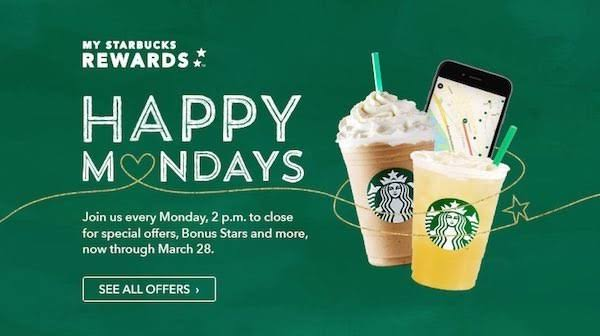

# Starbucks Corporation is an American multinational chain of coffeehouses and roastery reserves headquartered in Seattle, Washington. As the world's largest coffeehouse chain, Starbucks is seen to be the main representation of the United States' second wave of coffee culture. Since the 2000s, third wave coffee makers have targeted quality-minded coffee drinkers with hand-made coffee based on lighter roasts, while Starbucks nowadays uses automatic espresso machines for efficiency. As of early 2020, the company operates over 30,000 locations worldwide in more than 70 countries. Starbucks locations serve hot and cold drinks, whole-bean coffee, microground instant coffee known as VIA, espresso, caffe latte, full- and loose-leaf teas including Teavana tea products, Evolution Fresh juices, Frappuccino beverages, La Boulange pastries, and snacks including items such as chips and crackers; some offerings (including their annual fall launch of the Pumpkin Spice Latte) are seasonal or specific to the locality of the store.



# CREDITS
WWW.WIKIPEDIA.COM


WWW.STACKOVERFLOW

In [ ]:
#LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import math
import json
import datetime

import itertools

# plot libraries 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
print('All Packages Import')

#### Datasets

In [2]:
# read in the json files
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)
print("Loaded")

Loaded


### - Portfolio datasets 
Lets start with exploring the portfolio dataset:

In [3]:
print(portfolio.shape)
portfolio.head()

(10, 6)


,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [4]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [5]:
#lets count offer types
portfolio['offer_type'].value_counts()

discount         4
bogo             4
informational    2
Name: offer_type, dtype: int64

In [6]:
#describe
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


### - Profile datasets 
Lets start with exploring the Profile dataset:

In [7]:
print(profile.shape)
profile.head()

(17000, 5)


,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [8]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [9]:
# check for any duplicated values
print("duplicated :",profile.duplicated().sum())
#find any NaN values
print("NaN Values: \n",profile.isna().sum())

duplicated : 0
NaN Values: 
 gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64


In [10]:
#describe
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [11]:
#lets count age types
profile['age'].value_counts()

118    2175
58      408
53      372
51      363
54      359
       ... 
100      12
96        8
98        5
99        5
101       5
Name: age, Length: 85, dtype: int64

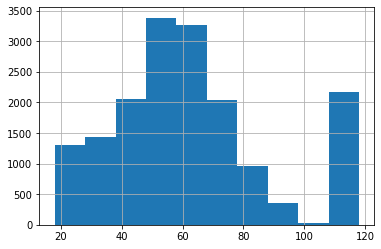

In [12]:
profile['age'].hist()

from above we can notice that even when we deleted age values of 118, Then also we have a maximum value of 101 for the age

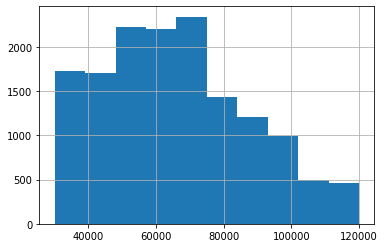

In [13]:
profile['income'].hist()

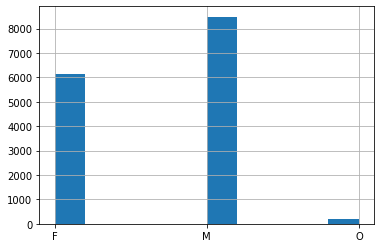

In [14]:
profile['gender'].hist()

In [15]:
#lets count gender types
profile['gender'].value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

### - Transcript datasets 
Lets start with exploring the Transcript dataset:

In [16]:
print(transcript.shape)
transcript.head()

(306534, 4)


,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [17]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [18]:
#find any NaN values
transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [19]:
#describe
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [20]:
#lets count event types
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

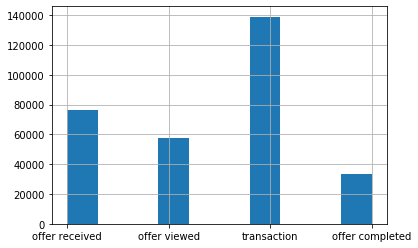

In [21]:
transcript['event'].hist()

## - Data Cleaning And Feature Engineering

### - Portfolio datasets cleaning


In [22]:
clean_portfolio = portfolio.copy() 

In [23]:
clean_portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [24]:
channels_unique = list(set(itertools.chain(*clean_portfolio.channels.tolist())))
print(channels_unique)

for channel in channels_unique:
    clean_portfolio[channel] = clean_portfolio.channels.apply(lambda x:1 if channel in x else 0 )

# drop the channels columns 
clean_portfolio.drop(columns=['channels'], inplace=True)
clean_portfolio.head()

['web', 'mobile', 'email', 'social']


,reward,difficulty,duration,offer_type,id,web,mobile,email,social
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,1,0


 - Rename id into offer_id.

In [25]:
# rename the id to offer id column
clean_portfolio.rename(columns={'id':'offer_id'}, inplace=True)
clean_portfolio.head()

,reward,difficulty,duration,offer_type,offer_id,web,mobile,email,social
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,1,0


  - handle the categorical offer_type.

In [26]:
clean_portfolio['offer_type'] = clean_portfolio['offer_type'].astype('category')
clean_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   reward      10 non-null     int64   
 1   difficulty  10 non-null     int64   
 2   duration    10 non-null     int64   
 3   offer_type  10 non-null     category
 4   offer_id    10 non-null     object  
 5   web         10 non-null     int64   
 6   mobile      10 non-null     int64   
 7   email       10 non-null     int64   
 8   social      10 non-null     int64   
dtypes: category(1), int64(7), object(1)
memory usage: 882.0+ bytes


 - Normalizing 'difficulty'  and 'reward' features using the MinMaxScaler.

In [27]:
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['difficulty','reward']

#features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
clean_portfolio[numerical] = scaler.fit_transform(clean_portfolio[numerical])

# Show an example of a record with scaling applied
clean_portfolio.head()

,reward,difficulty,duration,offer_type,offer_id,web,mobile,email,social
0,1.0,0.50,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1
1,1.0,0.50,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0.0,0.00,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0
3,0.5,0.25,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0
4,0.5,1.00,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,1,0


  - Preprocessing 'offer_id' Feature

In [28]:
clean_portfolio['offer_id'].value_counts()

f19421c1d4aa40978ebb69ca19b0e20d    1
ae264e3637204a6fb9bb56bc8210ddfd    1
fafdcd668e3743c1bb461111dcafc2a4    1
9b98b8c7a33c4b65b9aebfe6a799e6d9    1
4d5c57ea9a6940dd891ad53e9dbe8da0    1
5a8bc65990b245e5a138643cd4eb9837    1
3f207df678b143eea3cee63160fa8bed    1
0b1e1539f2cc45b7b9fa7c272da2e1d7    1
2298d6c36e964ae4a3e7e9706d1fb8c2    1
2906b810c7d4411798c6938adc9daaa5    1
Name: offer_id, dtype: int64

In [29]:
# replacing the 'offer_id' by more easy ids
labels_offer_id = clean_portfolio['offer_id'].astype('category').cat.categories.tolist()
replace_map_comp_offer_id = {'offer_id' : {k: v for k,v in zip(labels_offer_id,list(range(1,len(labels_offer_id)+1)))}}

# checking the new offer ids labels 
print(replace_map_comp_offer_id)

# replacing the categorical values in the 'offer_id' column by numberical values
clean_portfolio.replace(replace_map_comp_offer_id, inplace=True)
clean_portfolio.head()

{'offer_id': {'0b1e1539f2cc45b7b9fa7c272da2e1d7': 1, '2298d6c36e964ae4a3e7e9706d1fb8c2': 2, '2906b810c7d4411798c6938adc9daaa5': 3, '3f207df678b143eea3cee63160fa8bed': 4, '4d5c57ea9a6940dd891ad53e9dbe8da0': 5, '5a8bc65990b245e5a138643cd4eb9837': 6, '9b98b8c7a33c4b65b9aebfe6a799e6d9': 7, 'ae264e3637204a6fb9bb56bc8210ddfd': 8, 'f19421c1d4aa40978ebb69ca19b0e20d': 9, 'fafdcd668e3743c1bb461111dcafc2a4': 10}}


,reward,difficulty,duration,offer_type,offer_id,web,mobile,email,social
0,1.0,0.50,7,bogo,8,0,1,1,1
1,1.0,0.50,5,bogo,5,1,1,1,1
2,0.0,0.00,4,informational,4,1,1,1,0
3,0.5,0.25,7,bogo,7,1,1,1,0
4,0.5,1.00,10,discount,1,1,0,1,0


   - Preprocessing 'offer_type' Feature

In [30]:
clean_portfolio['offer_type'].value_counts()

discount         4
bogo             4
informational    2
Name: offer_type, dtype: int64

In [31]:
# replacing the 'offer_type' by integers representing each offer type
labels_offer_type = clean_portfolio['offer_type'].astype('category').cat.categories.tolist()
replace_map_comp_offer_type = {'offer_type' : {k: v for k,v in zip(labels_offer_type,list(range(1,len(labels_offer_type)+1)))}}

# checking the new offer types labels
print(replace_map_comp_offer_type)

# replacing the categorical values in the 'offer_type' column by numberical values
clean_portfolio.replace(replace_map_comp_offer_type, inplace=True)

{'offer_type': {'bogo': 1, 'discount': 2, 'informational': 3}}


In [32]:
clean_portfolio.head()

,reward,difficulty,duration,offer_type,offer_id,web,mobile,email,social
0,1.0,0.50,7,1,8,0,1,1,1
1,1.0,0.50,5,1,5,1,1,1,1
2,0.0,0.00,4,3,4,1,1,1,0
3,0.5,0.25,7,1,7,1,1,1,0
4,0.5,1.00,10,2,1,1,0,1,0


In [33]:
clean_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   reward      10 non-null     float64
 1   difficulty  10 non-null     float64
 2   duration    10 non-null     int64  
 3   offer_type  10 non-null     int64  
 4   offer_id    10 non-null     int64  
 5   web         10 non-null     int64  
 6   mobile      10 non-null     int64  
 7   email       10 non-null     int64  
 8   social      10 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 848.0 bytes


### - Profiles Datasets Data Cleaning 


In [34]:
# creating a copy from the dataset to be cleaned
clean_profile = profile.copy()
clean_profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN



 - Change the became_member_on to the date type instead of the current int value. also extract month, year and day       of becoming a member



In [35]:
# change the became member on field to date
profile.became_member_on = pd.to_datetime(profile.became_member_on, format="%Y%m%d")
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN


In [36]:
# extract membership year, month, day
profile['membership_year'] = profile.became_member_on.dt.year
profile['membership_month'] = profile.became_member_on.dt.month
profile['membership_day'] = profile.became_member_on.dt.day
profile.head()

,gender,age,id,became_member_on,income,membership_year,membership_month,membership_day
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,2017,2,12
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,15
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,2018,7,12
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5,9
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,2017,8,4


- Preprocessing **'customer_id'** Feature

In [37]:
# renaming 'id' column name to 'customer_id'.
clean_profile.rename(columns={'id':'customer_id'},inplace=True)

# Re-arranging the columns to have 'customer_id' column the first column in dataset
clean_profile = clean_profile.reindex(columns=['customer_id', 'age', 'became_member_on', 'gender', 'income'])

# confirming changes in columns order
clean_profile.columns

# replacing the 'customer_id' string values  with easiest numerical values
labels_customer_id = clean_profile['customer_id'].astype('category').cat.categories.tolist()
replace_map_comp_customer_id = {'customer_id' : {k: v for k,v in zip(labels_customer_id,list(range(1,len(labels_customer_id)+1)))}}

# replacing the  categorical labels in 'customer_id' column with numerical labels
clean_profile.replace(replace_map_comp_customer_id, inplace=True)

clean_profile.head()

,customer_id,age,became_member_on,gender,income
0,6962,118,20170212,None,NaN
1,399,55,20170715,F,112000.0
2,3747,118,20180712,None,NaN
3,7997,75,20170509,F,100000.0
4,10736,118,20170804,None,NaN


- Preprocessing **'age'** Feature

In [38]:
# replacing the age = 118 by NaN value
clean_profile['age'] = clean_profile['age'].apply(lambda x: np.nan if x == 118 else x)

# checking that the age = 118 does not longer exist, the output should be nothing 
clean_profile[clean_profile['age'] == 118] 

,customer_id,age,became_member_on,gender,income


In [39]:
# dropping rows with NaNs in 'age', 'gender' and 'income' columns
clean_profile.dropna(inplace=True)

In [40]:
# checking that the rows with missing values(NaNs) have been successfully dropped
clean_profile.isna().sum()

customer_id         0
age                 0
became_member_on    0
gender              0
income              0
dtype: int64

In [41]:
# changing the datatype of 'age' and 'income' columns to 'int'
clean_profile[['age','income']] = clean_profile[['age','income']].astype(int)

In [42]:
# creating a new column representing the age group to which the customer belongs 
clean_profile['age_group'] = pd.cut(clean_profile['age'], bins=[17, 22, 35, 60, 103],labels=['teenager', 'young-adult', 'adult', 'elderly'])

In [43]:
# checking the unique values in the newely created column
clean_profile['age_group'].head(10)

1           adult
3         elderly
5         elderly
8         elderly
12          adult
13        elderly
14    young-adult
15        elderly
16          adult
18          adult
Name: age_group, dtype: category
Categories (4, object): [teenager < young-adult < adult < elderly]

In [44]:
# replacing the 'age_group' categorical labels by numerical labels
labels_age_group = clean_profile['age_group'].astype('category').cat.categories.tolist()
replace_map_comp_age_group = {'age_group' : {k: v for k,v in zip(labels_age_group,list(range(1,len(labels_age_group)+1)))}}

In [45]:
print(replace_map_comp_age_group)

{'age_group': {'teenager': 1, 'young-adult': 2, 'adult': 3, 'elderly': 4}}


In [46]:
# replace categorical labels in 'age_group' column with numerical labels
clean_profile.replace(replace_map_comp_age_group, inplace=True)
# confirming that the replacement has been correctly performed 
clean_profile['age_group'].head(10)

1     3
3     4
5     4
8     4
12    3
13    4
14    2
15    4
16    3
18    3
Name: age_group, dtype: int64

- Preprocessing 'income' Feature

In [47]:
# creating a new column representing the age group to which the customer belongs 
clean_profile['income_range'] = pd.cut(clean_profile['income'], bins=[29999, 60000, 90000, 120001],labels=['average', 'above-average', 'high'])

# replacing the 'income_range' categorical labels by numerical labels
labels_income_range = clean_profile['income_range'].astype('category').cat.categories.tolist()
replace_map_comp_income_range = {'income_range' : {k: v for k,v in zip(labels_income_range,list(range(1,len(labels_income_range)+1)))}}

# checking the categorical labels and its corresponding numerical labels for 'income_range' column
print(replace_map_comp_income_range)

# replacing categorical labels in 'income_range' column with numerical labels
clean_profile.replace(replace_map_comp_income_range, inplace=True)

clean_profile.head()

{'income_range': {'average': 1, 'above-average': 2, 'high': 3}}


,customer_id,age,became_member_on,gender,income,age_group,income_range
1,399,55,20170715,F,112000,3,3
3,7997,75,20170509,F,100000,4,3
5,15044,68,20180426,M,70000,4,2
8,3729,65,20180209,M,53000,4,1
12,3060,58,20171111,M,51000,3,1


- Preprocessing 'gender' Feature

In [48]:
# replacing the 'gender' categorical labels with coressponding numerical label
labels_gender = clean_profile['gender'].astype('category').cat.categories.tolist()
replace_map_comp_gender = {'gender' : {k: v for k,v in zip(labels_gender,list(range(1,len(labels_gender)+1)))}}
clean_profile.replace(replace_map_comp_gender, inplace=True)

# checking the numerical label and its corresponding categorical label
print(replace_map_comp_gender)

clean_profile.head()

{'gender': {'F': 1, 'M': 2, 'O': 3}}


,customer_id,age,became_member_on,gender,income,age_group,income_range
1,399,55,20170715,1,112000,3,3
3,7997,75,20170509,1,100000,4,3
5,15044,68,20180426,2,70000,4,2
8,3729,65,20180209,2,53000,4,1
12,3060,58,20171111,2,51000,3,1


- Preprocessing 'membership_days' Feature

In [49]:
# changing the datatype of 'became_member_on' column from int to date and put it in the appropriate format
clean_profile['became_member_on'] = pd.to_datetime(clean_profile['became_member_on'], format = '%Y%m%d')

# adding a new column 'start_year', that will present the year at which the customer became a member
clean_profile['membership_year'] = clean_profile['became_member_on'].dt.year

# adding a new column 'membership_days' ,that will present the number of days since the customer become a member
clean_profile['membership_days'] = datetime.datetime.today().date() - clean_profile['became_member_on'].dt.date

# removing the 'days' unit
clean_profile['membership_days'] = clean_profile['membership_days'].dt.days

clean_profile.head()

,customer_id,age,became_member_on,gender,income,age_group,income_range,membership_year,membership_days
1,399,55,2017-07-15,1,112000,3,3,2017,1061
3,7997,75,2017-05-09,1,100000,4,3,2017,1128
5,15044,68,2018-04-26,2,70000,4,2,2018,776
8,3729,65,2018-02-09,2,53000,4,1,2018,852
12,3060,58,2017-11-11,2,51000,3,1,2017,942


In [50]:
# creating a new column 'member_type' representing the type of the member: new, regular or loyal depending on the number of his 'membership_days'
clean_profile['member_type'] = pd.cut(clean_profile['membership_days'], bins=[390, 1000, 1600, 2500],labels=['new', 'regular', 'loyal'])

# replacing the 'member_type' categorical labels by numerical labels
labels_member_type = clean_profile['member_type'].astype('category').cat.categories.tolist()
replace_map_comp_member_type = {'member_type' : {k: v for k,v in zip(labels_member_type,list(range(1,len(labels_member_type)+1)))}}

# checking the numerical label and its corresponding categorical label
print(replace_map_comp_member_type)

# replacing categorical labels in 'member_type' column with numerical labels
clean_profile.replace(replace_map_comp_member_type, inplace=True)

# dropping 'age','income', 'became_member_on' and 'membership_days' columns, since they are no longer needed.
clean_profile.drop(columns = ['age','income','became_member_on', 'membership_days'], axis=1, inplace=True)

clean_profile.head()

{'member_type': {'new': 1, 'regular': 2, 'loyal': 3}}


,customer_id,gender,age_group,income_range,membership_year,member_type
1,399,1,3,3,2017,2.0
3,7997,1,4,3,2017,2.0
5,15044,2,4,2,2018,1.0
8,3729,2,4,1,2018,1.0
12,3060,2,3,1,2017,1.0


In [51]:
# confirming changes
print(clean_profile.columns)
clean_profile.head()


Index(['customer_id', 'gender', 'age_group', 'income_range', 'membership_year',
       'member_type'],
      dtype='object')


,customer_id,gender,age_group,income_range,membership_year,member_type
1,399,1,3,3,2017,2.0
3,7997,1,4,3,2017,2.0
5,15044,2,4,2,2018,1.0
8,3729,2,4,1,2018,1.0
12,3060,2,3,1,2017,1.0


### - Transcript Datasets Data Cleaning 

In [52]:
# create a copy from the dataset to be cleaned
clean_transcript = transcript.copy()

In [53]:
clean_transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0




 - Preprocess 'person' Feature


In [54]:
# renaming 'person' column to 'customer_id' and 'time' column to 'time_h'
clean_transcript.rename(columns={'person':'customer_id','time':'time_h' },inplace=True)

In [55]:


# replace categorical labels in 'customer_id' column with numerical labels
clean_transcript.replace(replace_map_comp_customer_id, inplace=True)

# checking the first few entries in the 'customer_id' columns
clean_transcript.head()

,customer_id,event,value,time_h
0,7997,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,10736,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,15044,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,9525,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,6940,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


-  Preprocessing 'value' Feature

In [56]:
# getting the different keys  that exists in the 'value' column
keys = []
for idx, row in clean_transcript.iterrows():
    for k in row['value']:
        if k in keys:
            continue
        else:
            keys.append(k)
            
# checking the different keys of the 'value' dictionary
keys

['offer id', 'amount', 'offer_id', 'reward']

In [57]:

clean_transcript['offer_id'] = '' # datatype : string
clean_transcript['amount'] = 0  # datatype : integer
clean_transcript['reward'] = 0  # datatype : integer

In [58]:

for idx, row in clean_transcript.iterrows():
    for k in row['value']:
        if k == 'offer_id' or k == 'offer id': # b/c 'offer_id' and 'offer id' are representing the same thing 
            clean_transcript.at[idx, 'offer_id'] = row['value'][k]
        if k == 'amount':
            clean_transcript.at[idx, 'amount'] = row['value'][k]
        if k == 'reward':
            clean_transcript.at[idx, 'reward'] = row['value'][k]

In [59]:
# filling all the NaNs in the 'offer_id' column with 'N/A' values (i.e. Not Applicable)
clean_transcript['offer_id'] = clean_transcript['offer_id'].apply(lambda x: 'N/A' if x == '' else x)

# dropping the 'value' column 
clean_transcript.drop('value', axis=1, inplace=True)

In [60]:
clean_transcript.head()

,customer_id,event,time_h,offer_id,amount,reward
0,7997,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0
1,10736,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0
2,15044,offer received,0,2906b810c7d4411798c6938adc9daaa5,0,0
3,9525,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0,0
4,6940,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,0


- Preprocessing 'event' Feature


In [61]:
# checking the unique values in 'event' column
clean_transcript['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [62]:
# excluding all events of 'transaction' from our clean_transcript dataset
clean_transcript = clean_transcript[clean_transcript['event'] != 'transaction']

# excluding all events of 'offer received' 
clean_transcript = clean_transcript[clean_transcript['event'] != 'offer received']

In [63]:
# checking that the events of either 'transaction' or 'offer received'were successfully removed from the dataset
clean_transcript['event'].unique() 

array(['offer viewed', 'offer completed'], dtype=object)

In [64]:
# replacing the 'event' categorical labels with coressponding numerical label
labels_event = clean_transcript['event'].astype('category').cat.categories.tolist()
replace_map_comp_event = {'event' : {k: v for k,v in zip(labels_event,list(range(1,len(labels_event)+1)))}}

In [65]:
# checking the numerical label and its corresponding categorical label
print(replace_map_comp_event)

{'event': {'offer completed': 1, 'offer viewed': 2}}


In [66]:
# replace categorical labels in 'event' column with numerical labels
clean_transcript.replace(replace_map_comp_event, inplace=True)

In [67]:
clean_transcript.head()

,customer_id,event,time_h,offer_id,amount,reward
12650,3729,2,0,f19421c1d4aa40978ebb69ca19b0e20d,0,0
12651,13995,2,0,5a8bc65990b245e5a138643cd4eb9837,0,0
12652,1052,2,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,0
12653,170,2,0,ae264e3637204a6fb9bb56bc8210ddfd,0,0
12655,12744,2,0,5a8bc65990b245e5a138643cd4eb9837,0,0


- Preprocessing 'offer_id' Feature

In [68]:
# replacing the categorical values in the 'offer_id' column by its corresponding numerical values
clean_transcript.replace(replace_map_comp_offer_id, inplace=True)

In [69]:
# confirming the changes done 
print(clean_transcript.columns)
clean_transcript.head()

Index(['customer_id', 'event', 'time_h', 'offer_id', 'amount', 'reward'], dtype='object')


,customer_id,event,time_h,offer_id,amount,reward
12650,3729,2,0,9,0,0
12651,13995,2,0,6,0,0
12652,1052,2,0,5,0,0
12653,170,2,0,8,0,0
12655,12744,2,0,6,0,0


#### Mergeing

In [70]:
# merge 'clean_transcript' dataset with 'clean_portfolio' on 'offer_id'
master_df =clean_transcript.merge(clean_portfolio,how='left',on='offer_id')

In [71]:
# join 'master_df' dataset with 'clean_profile' on 'customer_id'
master_df = master_df.merge(clean_profile,how ='left', on = 'customer_id')

In [72]:
# checking our newely created master dataset
master_df.head()

,customer_id,event,time_h,offer_id,amount,reward_x,reward_y,difficulty,duration,offer_type,web,mobile,email,social,gender,age_group,income_range,membership_year,member_type
0,3729,2,0,9,0,0,0.5,0.25,5,1,1,1,1,1,2.0,4.0,1.0,2018.0,1.0
1,13995,2,0,6,0,0,0.0,0.00,3,3,0,1,1,1,3.0,3.0,1.0,2017.0,1.0
2,1052,2,0,5,0,0,1.0,0.50,5,1,1,1,1,1,1.0,4.0,1.0,2016.0,2.0
3,170,2,0,8,0,0,1.0,0.50,7,1,0,1,1,1,1.0,1.0,1.0,2016.0,2.0
4,12744,2,0,6,0,0,0.0,0.00,3,3,0,1,1,1,2.0,3.0,1.0,2014.0,3.0


In [73]:
master_df.shape

(91304, 19)

In [74]:
# check if we have any missing values 
master_df.isna().sum()

customer_id           0
event                 0
time_h                0
offer_id              0
amount                0
reward_x              0
reward_y              0
difficulty            0
duration              0
offer_type            0
web                   0
mobile                0
email                 0
social                0
gender             9000
age_group          9000
income_range       9000
membership_year    9000
member_type        9083
dtype: int64

In [75]:
# removing any row that contain NaNs
master_df = master_df.dropna(how='any',axis=0) 

In [76]:
# check if we have any missing values 
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82221 entries, 0 to 91303
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      82221 non-null  int64  
 1   event            82221 non-null  int64  
 2   time_h           82221 non-null  int64  
 3   offer_id         82221 non-null  int64  
 4   amount           82221 non-null  int64  
 5   reward_x         82221 non-null  int64  
 6   reward_y         82221 non-null  float64
 7   difficulty       82221 non-null  float64
 8   duration         82221 non-null  int64  
 9   offer_type       82221 non-null  int64  
 10  web              82221 non-null  int64  
 11  mobile           82221 non-null  int64  
 12  email            82221 non-null  int64  
 13  social           82221 non-null  int64  
 14  gender           82221 non-null  float64
 15  age_group        82221 non-null  float64
 16  income_range     82221 non-null  float64
 17  membership_y


### Exploratory Data Analysis

In [77]:
# reconverting the values of the following features from numerical values to its original categorical values.
master_df['event'] = master_df['event'].map({1: 'Completed', 2: 'Viewed'})
master_df['offer_type'] = master_df['offer_type'].map({1: 'BOGO', 2: 'Discount', 3: 'Informational'})
master_df['income_range'] = master_df['income_range'].map({1: 'Average', 2: 'Above-Average', 3:'High'})
master_df['age_group'] = master_df['age_group'].map({1: 'teenager', 2: 'young-adult', 3:'adult', 4:'elderly'})

# 1.Find the common offer in each age group?

In [ ]:
# plt.figure(figsize=(14, 6))
g = sns.countplot(x="age_group", hue="offer_type", data=master_df)
plt.title('Most Popular Offers to Each Age Group')
plt.ylabel('Total')
plt.xlabel('Age Group')
xlabels = ['teenager','young-adult','adult','elderly']
g.set_xticklabels(xlabels)
plt.xticks(rotation = 0)
plt.legend(title='Offer Type')
plt.show();

#The most common type of offer among all age groups is BOGO, followed by discounted offers. Considering that the least common offer to send are informative offers. I think the BOGO offers are more interesting than other offers provided by Starbucks.

# 2. Based on the highest income bracket for men or women?

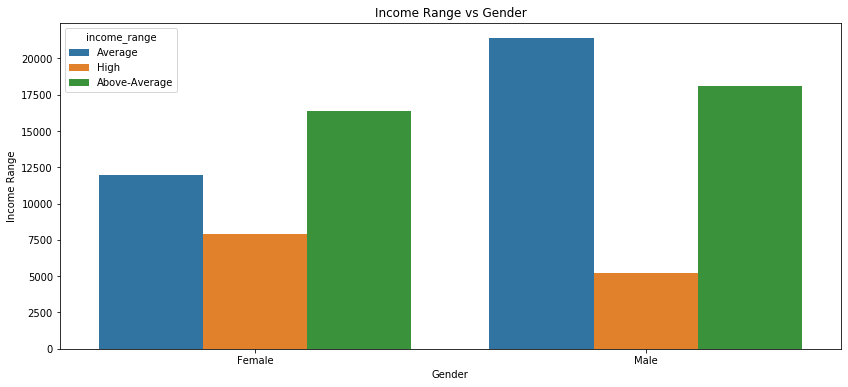

In [79]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x="gender", hue="income_range", data= master_df[master_df["gender"] != 3])
plt.title('Income Range vs Gender')
plt.ylabel('Income Range')
xlabels = ['Female', 'Male']
g.set_xticklabels(xlabels)
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.show();

High-income clients (over 90,000) are mostly women. While the middle-income customers (30,000-60,000) are mainly men.

# - 3. How many new members join Starbucks App on each year?

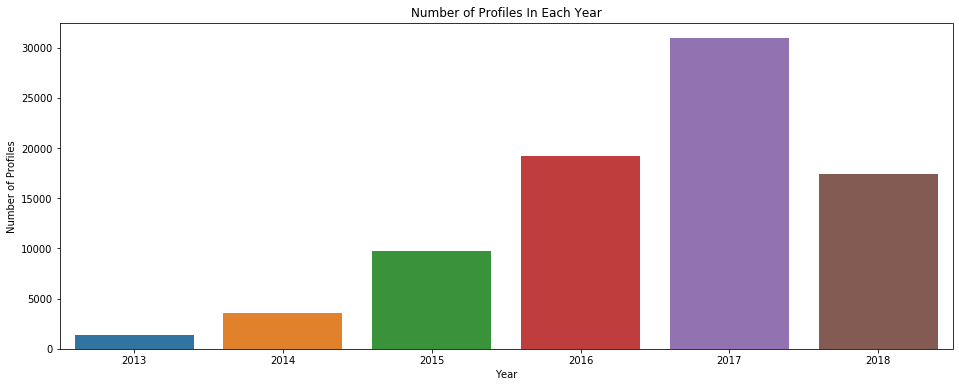

In [80]:
master_df['membership_year'] = master_df['membership_year'].astype(int)

plt.figure(figsize=(16, 6))
sns.countplot(master_df['membership_year'])
plt.title('Number of Profiles In Each Year')
plt.ylabel('Number of Profiles')
plt.xlabel('Year')
plt.xticks()
plt.show();

In [81]:
# getting the number of customers that became members on 2017
members_2017 = (master_df['membership_year']==2017).sum()

# getting the total number of members among all the available years
total = master_df['membership_year'].count()

# getting the percentages of customers that became members on 2017
perc_2017 = round((members_2017/total)*100,2)

print(members_2017)
perc_2017

30938


37.63

From our dataset we can conclude that 2017 was the best year for starbucks we notice that there increases of 38% in memberships

# - 4. Which offers types each gender likes?

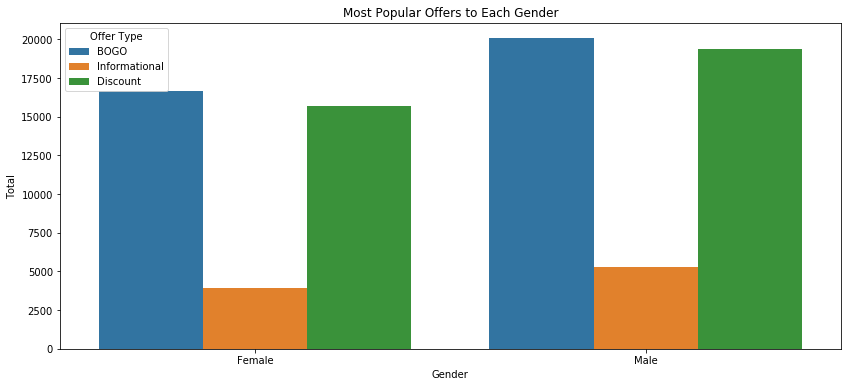

In [82]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='gender', hue="offer_type", data= master_df[master_df["gender"] != 3])
plt.title('Most Popular Offers to Each Gender')
plt.ylabel('Total')
plt.xlabel('Gender')
xlabels = ['Female', 'Male']
g.set_xticklabels(xlabels)
plt.legend(title='Offer Type')
plt.show();

This shows both genders like bogo and discount offers rather than informational offers

5.The average time for transcript?

In [83]:
tran_avg_len = master_df.groupby(['customer_id', 'offer_id'])['time_h'].mean().reset_index()
tran_avg_len['time_h'].mean(), tran_avg_len['time_h'].mean() / 24

(372.2618460619763, 15.510910252582347)

The average time for an customers to compelte the offer is less than 16days Which is near to 372 hours

6. How many offers are viewed and completed by customers

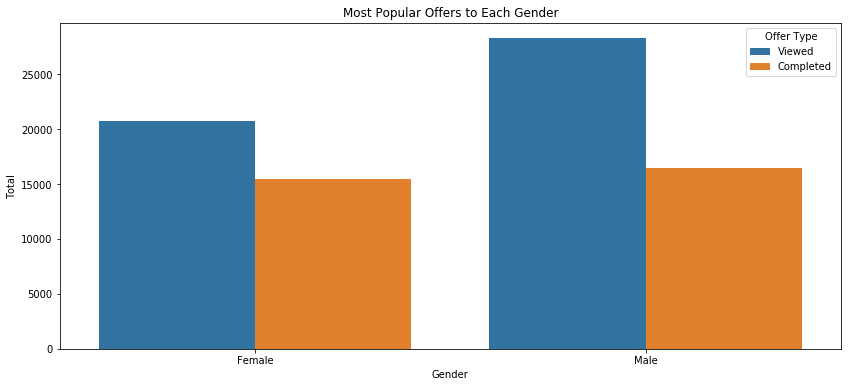

In [84]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='gender', hue="event", data= master_df[master_df["gender"] != 3])
plt.title('Most Popular Offers to Each Gender')
plt.ylabel('Total')
plt.xlabel('Gender')
xlabels = ['Female', 'Male']
g.set_xticklabels(xlabels)
plt.legend(title='Offer Type')
plt.show();

In [85]:
total_trans_g_o = master_df[master_df["gender"] != 3].groupby(['gender','offer_type']).count()
total_trans_g_e = master_df[master_df["gender"] != 3].groupby(['gender','event']).count()
total_trans_go_o_t = total_trans_g_o.loc[(1)]['event'].sum()
total_trans_go_o_tt = total_trans_g_o.loc[(2)]['event'].sum()
total_trans_go_o_t_offers_f = total_trans_g_o.loc[(1)].loc[['BOGO', 'Discount', 'Informational']]['event'].sum()
total_trans_go_o_t_offers_m = total_trans_g_o.loc[(2)].loc[['BOGO', 'Discount', 'Informational']]['event'].sum()

In [86]:
print('For Females:')
print(f"Number of offer completed: {total_trans_g_e.loc[(1, 'Completed')].values[0]}, {round((total_trans_g_e.loc[(1, 'Completed')].values[0]/total_trans_g_e.loc[(1, 'Viewed')].values[0])*100,2)}% of total offers viewed.")
print(f"Number of offer viewed: {total_trans_g_e.loc[(1, 'Viewed')].values[0]}.")

print('\nFor Males:')
print(f"Number of offer completed: {total_trans_g_e.loc[(2, 'Completed')].values[0]}, {round((total_trans_g_e.loc[(2, 'Completed')].values[0]/total_trans_g_e.loc[(2, 'Viewed')].values[0])*100,2)}% of total offers viewed.")
print(f"Number of offer viewed: {total_trans_g_e.loc[(2, 'Viewed')].values[0]}.")

For Females:
Number of offer completed: 15469, 74.47% of total offers viewed.
Number of offer viewed: 20771.

For Males:
Number of offer completed: 16439, 58.15% of total offers viewed.
Number of offer viewed: 28268.


Women completed about 75% of the offers they saw, 16% more than men who just completed 58% of the offers they saw. Women seem convinced of the easier promotion of men.They saw. Women seem convinced of the easier promotion of men.

In [87]:
# Replacing the categorical values of the features by its corresponding numerical values, as before
labels_event1 = master_df['event'].astype('category').cat.categories.tolist()
replace_map_comp_event1 = {'event' : {k: v for k,v in zip(labels_event1,list(range(1,len(labels_event1)+1)))}}

labels_income1 = master_df['income_range'].astype('category').cat.categories.tolist()
replace_map_comp_income_range1 = {'income_range' : {k: v for k,v in zip(labels_income1,list(range(1,len(labels_income1)+1)))}}

labels_offer_type1 = master_df['offer_type'].astype('category').cat.categories.tolist()
replace_map_comp_offer_type1 = {'offer_type' : {k: v for k,v in zip(labels_offer_type1,list(range(1,len(labels_offer_type1)+1)))}}

master_df.replace(replace_map_comp_event1, inplace=True)
master_df.replace(replace_map_comp_offer_type1, inplace=True)
master_df.replace(replace_map_comp_income_range1, inplace=True)
master_df.replace(replace_map_comp_age_group, inplace=True)

In [88]:
# confirming changes
master_df.head()

,customer_id,event,time_h,offer_id,amount,reward_x,reward_y,difficulty,duration,offer_type,web,mobile,email,social,gender,age_group,income_range,membership_year,member_type
0,3729,2,0,9,0,0,0.5,0.25,5,1,1,1,1,1,2.0,4,2,2018,1.0
1,13995,2,0,6,0,0,0.0,0.00,3,3,0,1,1,1,3.0,3,2,2017,1.0
2,1052,2,0,5,0,0,1.0,0.50,5,1,1,1,1,1,1.0,4,2,2016,2.0
3,170,2,0,8,0,0,1.0,0.50,7,1,0,1,1,1,1.0,1,2,2016,2.0
4,12744,2,0,6,0,0,0.0,0.00,3,3,0,1,1,1,2.0,3,2,2014,3.0


In [89]:
master_df.to_csv('master_df.csv')

# - Modeling

In [90]:
master_df.columns

Index(['customer_id', 'event', 'time_h', 'offer_id', 'amount', 'reward_x',
       'reward_y', 'difficulty', 'duration', 'offer_type', 'web', 'mobile',
       'email', 'social', 'gender', 'age_group', 'income_range',
       'membership_year', 'member_type'],
      dtype='object')

**Features are as follows:**
    - time_h
    - offer_id
    - amount
    - reward_x ( Will be renamed to 'reward')
    - difficulty
    - duration_h
    - offer_type
    - gender
    - age_group
    - income_range
    - member_type

**Target is:**
    - 'event':
        - 1 : offer completed
        - 2 : offer viewed

In [91]:
# Rename 'reward_x' column to 'reward'
master_df.rename(columns ={'reward_x':'reward'}, inplace = True)

In [92]:
# Split the data into features and target label
X = master_df[['time_h','offer_id','amount','reward','difficulty','duration','offer_type','gender','age_group','income_range', 'member_type']]
Y = master_df['event']

In [93]:
X.head()

,time_h,offer_id,amount,reward,difficulty,duration,offer_type,gender,age_group,income_range,member_type
0,0,9,0,0,0.25,5,1,2.0,4,2,1.0
1,0,6,0,0,0.00,3,3,3.0,3,2,1.0
2,0,5,0,0,0.50,5,1,1.0,4,2,2.0
3,0,8,0,0,0.50,7,1,1.0,1,2,2.0
4,0,6,0,0,0.00,3,3,2.0,3,2,3.0


In [94]:
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: event, dtype: int64

In [95]:
# normalizing some numerical values 
scaler = MinMaxScaler()
features = ['time_h', 'amount', 'reward', 'duration']
X_scaled = X.copy()
X_scaled[features] = scaler.fit_transform(X_scaled[features])
X_scaled.head()

,time_h,offer_id,amount,reward,difficulty,duration,offer_type,gender,age_group,income_range,member_type
0,0.0,9,0.0,0.0,0.25,0.285714,1,2.0,4,2,1.0
1,0.0,6,0.0,0.0,0.00,0.000000,3,3.0,3,2,1.0
2,0.0,5,0.0,0.0,0.50,0.285714,1,1.0,4,2,2.0
3,0.0,8,0.0,0.0,0.50,0.571429,1,1.0,1,2,2.0
4,0.0,6,0.0,0.0,0.00,0.000000,3,2.0,3,2,3.0


In [96]:
# creating training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [97]:
X_train.shape, X_test.shape

((61665, 11), (20556, 11))

In [98]:
y_train.shape, y_test.shape

((61665,), (20556,))

In [99]:
# defining a function to calculate the accuracy for the models we will try below 
from sklearn.metrics import plot_roc_curve
def predict_score(model):
    pred = model.predict(X_test)
    
    # Calculate the absolute errors
    errors = abs(pred - y_test)
    
    # Calculate mean absolute percentage error
    mean_APE = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mean_APE)
    
    return round(accuracy, 4)

**Decision Tree**

Accuracy of Decision Tree classifier on training set: 100.0%.
Prediction Accuracy: 100.0%


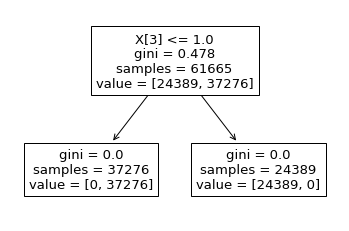

In [106]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

dt.fit(X_train, y_train)

tree.plot_tree(dt) 
print(f'Accuracy of Decision Tree classifier on training set: {round(dt.score(X_train, y_train)*100,2)}%.')
print(f'Prediction Accuracy: {predict_score(dt)}%')

**Naive Bayes**

Accuracy of SVM classifier on training set: 100.0%.
Prediction Accuracy: 100.0%


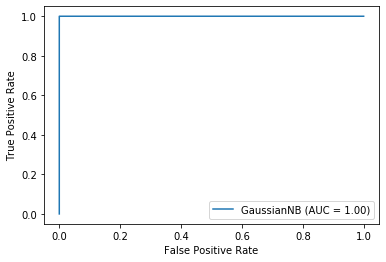

In [101]:
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
gnb_disp = plot_roc_curve(gnb, X_test, y_test)
print(f'Accuracy of SVM classifier on training set: {round(gnb.score(X_train, y_train)*100,2)}%.')
print(f'Prediction Accuracy: {predict_score(gnb)}%')

**K-Nearest Neighbors**

Accuracy of K-NN classifier on training set: 99.95%.
Prediction Accuracy: 99.9538%


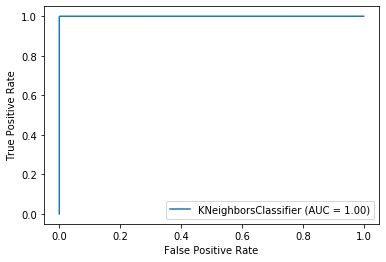

In [102]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
knn_disp = plot_roc_curve(knn, X_test, y_test)
print(f'Accuracy of K-NN classifier on training set: {round(knn.score(X_train, y_train)*100,2)}%.')
print(f'Prediction Accuracy: {predict_score(knn)}%')

**LogisticRegression**

In [ ]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
logreg_disp = plot_roc_curve(logreg, X_test, y_test)
print(f'Accuracy of Logistic regression classifier on training set: {round(logreg.score(X_train, y_train)*100,2)}%.')
print(f'Prediction Accuracy: {predict_score(logreg)}%')

**Random Forest**

In [104]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

rf.fit(X_train, y_train)

print(f'Accuracy of SVM classifier on training set: {round(rf.score(X_train, y_train)*100,2)}%.')
print(f'Prediction Accuracy: {predict_score(rf)}%')

Accuracy of SVM classifier on training set: 100.0%.
Prediction Accuracy: 100.0%


**Support Vector Machine**

In [111]:
from sklearn import svm
svm = svm.SVC(gamma = 'auto')

svm.fit(X_train, y_train)
print(f'Accuracy of SVM classifier on training set: {round(svm.score(X_train, y_train)*100,2)}%.')
print(f'Prediction Accuracy: {predict_score(svm)}%')

Accuracy of SVM classifier on training set: 100.0%.
Prediction Accuracy: 99.9927%


### Model Evaluation

In [112]:
# creating the variables that will be used to fill the results table
models = [svm, dt, gnb, knn, rf, logreg]
model_names = [type(n).__name__ for n in models]
training_accuracy = [x.score(X_train, y_train)*100 for x in models]
predection_accuracy = [predict_score(y) for y in models]

In [113]:
# structuring a table to view the results of the different model tried above
results = [training_accuracy, predection_accuracy]
results_df = pd.DataFrame(results, columns = model_names, index=['Training Accuracy', 'Predicting Accuracy']) 

In [114]:
# show the results dataframe 
results_df

,SVC,DecisionTreeClassifier,GaussianNB,KNeighborsClassifier,RandomForestRegressor,LogisticRegression
Training Accuracy,99.998378,100.0,100.0,99.948107,100.0,100.0
Predicting Accuracy,99.992700,100.0,100.0,99.953800,100.0,100.0


The table above shows the accuracy score related to the use of different supervised learning models. As presented in the table, we had 100% accuracy in the training and test sets for 4 models (out of 6). To avoid oversizing as much as possible, I will choose the model that gave me the lowest accuracy score in the test suite, which is the KNeighbors classifier. In this model, I got 99.92% on the test suite. I know this is a very high score, but the other scores are higher than that. I chose this model because I think it can be used to solve a binary result problem statement. Whether the customer will see the offer (only by seeing) or he (will complete the offer).

## Conclusion

# The analysis on the datasets allowed me to get the following insights:


Member type" function derived from the "become a member" function. Of course, the labels of the official categories of characteristics have been positioned on the corresponding numeric labels, as follows:
1: new members 1,000 days or less) -
2: normal (1001–1,600 subscription days)
3: Loyal (over 1,600 days subscription) Analysis: customer earnings range from 30,000 to 120,000 with most customer earnings between 50,000 and 75,000.

According to the available data, there are three categories of "gender" in which the customers are located (M, F and O). Taking into account the previous observation that there are 2,175 missing values, male customers (8,484 men) are more than female customers (6,129 women) with 57% of male customers compared to 41% female. However, there are 212 customers who have chosen "O" as their gender.

The most common type of offer among all age groups is BOGO, followed by discounted offers. Considering that the least common offer to send are informative offers. I think the BOGO offers are more interesting than other offers provided by Starbucks.

High-income clients (over 90,000) are mostly women. While the middle-income customers (30,000-60,000) are mainly men.
Men and women are quite close when it comes to the time it takes to complete an offer. Men and women take about 17 days to do it.

2017 was the best year for Starbucks
38% of Starbucks 🌟 customers in our dataset had became members

Both males and females likes BOGO AND DISCOUNT offers but not informational offers

The average time taken by a customer to complete an offer is less than 16 days (372 hours). Women completed about 75% of the offers they saw, 16% more than men who just completed 58% of the offers they saw.

Women seem convinced of the easier promotion of men.They saw. Women seem convinced of the easier promotion of men.